In [ ]:
# write a python program for a given x find y's derivative w.r.t x( the value of dy/dx ) y = x^2

In [ ]:
def dy_dx(x):
  return 2*x

In [ ]:
dy_dx(3)

6

In [ ]:
# write a python program for a given x find z 's derivative w.r.t x( the value of dz/dx )  y = x^2 , z = sin(y)

In [ ]:
import math

def dz_dx(x):
  return 2 * x * math.cos(x**2)

In [ ]:
dz_dx(2)

-2.6145744834544478

In [1]:
# Autograd
# Examples:
# y = x^2
# y = x^2, z= sin(y)
# neural network

In [ ]:
# example 1 : y = x^2 find dy/dx for any given x

In [3]:
import torch

In [3]:
x = torch.tensor(3.0, requires_grad=True)

# whenever we set requires_grad as True ( by default its false )
# pytorch understands that we want to calc derivative of the tensor
# whatever operations we will do on this tensor pytorch will constantly
# track the operations and when we ask pytorch will instantly calc derivative of it.

# NOTE: whenever we want derivative of a tensor then while making it make sure
# to keep requires_grad as True

In [4]:
# creating relationship b/w y and x

y = x**2

In [5]:
x

tensor(3., requires_grad=True)

In [6]:
y
# since we have done required_grad = True ,
# # we see calculated y and also an attribute as PowBackward
# # what happens is that when we say pytorch that we want to calc
# gradient pytorch internally makes a computation graph
# ex : int this scenario computation graph will look like this
# x ---- sq ---- y
# -------->
# when we go in this direction we are calculating y with help of x y = x^2
# we call it forward dir.

# x ---- sq ---- y
#       <--------
# and when we go in this direction ( backward direction)
# then pytorch will calc this quantity (dy/dx)
# and to calc this quantity pytorch should know what mathematical operation
# is performed here

# that is why when we print y pytorch remembers that back dir there was
# power function
# hence PowBackward - power backward

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
# x --- sq --- y
# 3     ^2     9
# --------->
# the forward operation is done
      # <--------
          #  6
# now let's go for backward operation (calc dy/dx)
# y = x^2 ---> dy/dx = 2x ---> 2(3) ----> 6
# dy/dx = 6

In [7]:
y.backward() # pytorch will calc the derivative

In [8]:
x.grad

# as we can see we are getting 6 (dy/dx = 6)

tensor(6.)

In [ ]:
# hence we did not have to create any func to find derivative like before
# we just simply defined our x , we put required_grad as true, we calc y in the forward dir
# then we just simply did y.backward() - which calculated all the gradients in the backward dir
# to see the gradients value we did x.grad

In [ ]:
# Example 2 : nested func
# y = x^2 , z = sin(y)
# calc dz/dx for any given x

# ex: x = 3 , dz/dx = -5.466

In [9]:
import math

def dz_dx(x):
  return 2 * x * math.cos(x**2)

In [11]:
dz_dx(3)

-5.466781571308061

In [ ]:
# let's do the same thing with pytorch and compare the result

In [12]:
# define x

x = torch.tensor(3.0, requires_grad=True)

In [13]:
y = x**2

In [14]:
z = torch.sin(y)

In [15]:
x

tensor(3., requires_grad=True)

In [16]:
y

tensor(9., grad_fn=<PowBackward0>)

In [17]:
z

tensor(0.4121, grad_fn=<SinBackward0>)

In [ ]:
# computation graph will look like this

# x ----- sq ------ y ------ sin ----- z
# -----------> forward dir
# 3       ^2       9         sin(9)    0.4
# y = 9 , z = 0.4

# x ----- sq ------ y ------ sin ----- z
#               <---------- backward dir
# dz/dx   dy/dx             dz/dy

# we want dz/dx therefore we have to move in backward dir and apply chain rule

# to apply dz/dy pytorch should know what math operation has been applied there(sin)
# hence, sinBackward

# to apply dy/dx pytorch should know what math operation has been applied there(square)
# hence, PowBackward

# by making computation graph internally, pytorch remembers that the i/p tensor
# has been through what what operation so that it can backtrack and apply all derivatives
# and then multiply all derivative and apply chain rule

In [18]:
z.backward() # calculates derivative

In [19]:
x.grad # shows the derivative calculated --- dz/dx

tensor(-5.4668)

In [20]:
# what if we try to print y.grad
# will it print? no
y.grad

# explaination below



<ipython-input-20-08d6395458c6>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [ ]:
''' the concept is when our computation graph is built , since its a graph
it has nodes, there are three types of nodes - leaf node(input node), root node(last node)(output tensor)
intermediate nodes (middle nodes),  and by default around intermediate nodes gradients are not calculated  '''

In [ ]:
# Example 3 - Neural Network

In [ ]:
# manually calculating derivative ( means applying forward and back propagation)

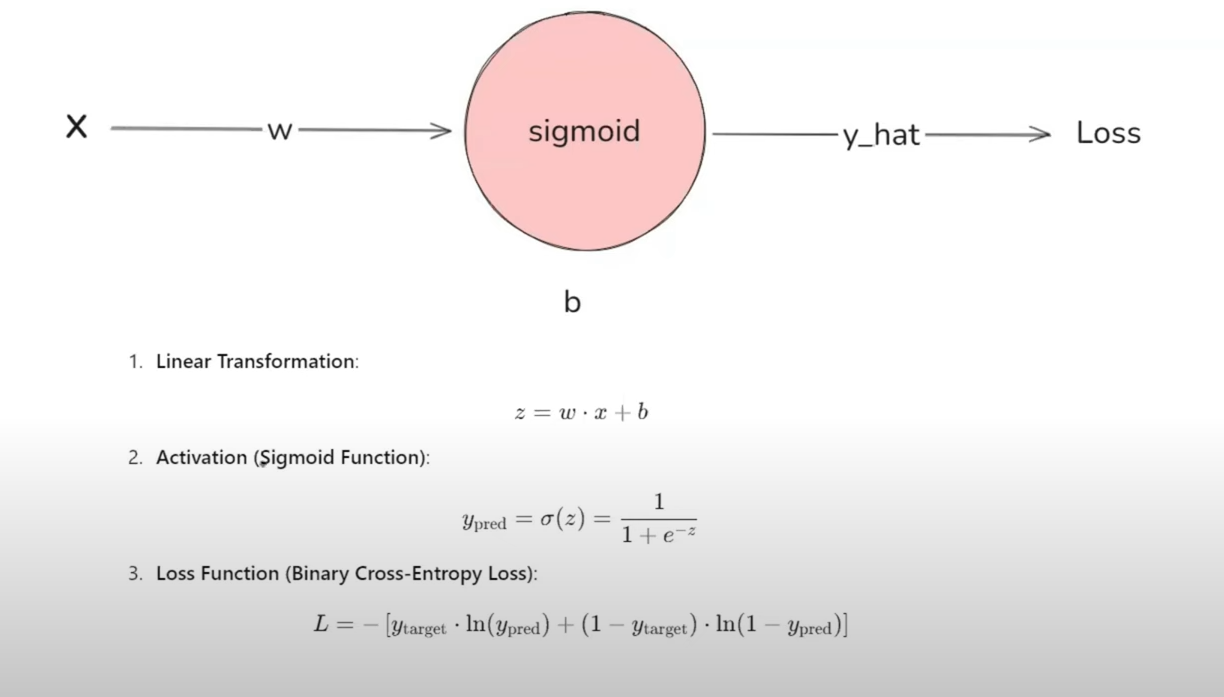

In [22]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature (cpga)
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [12]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [24]:
# Forward pass (refer notes)
z = w * x + b  # Weighted sum (linear part) step 1 (linear transformation)
y_pred = torch.sigmoid(z)  # Predicted probability step 2 (activation)

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)   # step 3 (loss function)

In [25]:
loss

tensor(6.7012)

In [27]:
# backpropagation (refer notes)

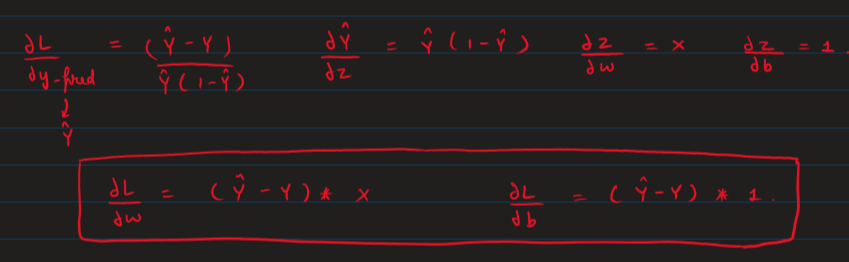

In [28]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [29]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


In [ ]:
# calculating derivative with autograd

In [4]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

# here we have not done required_grad = True as we are not fidning derivative wrt x and y

In [5]:
w = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(0.0, requires_grad = True)

In [6]:
w

tensor(1., requires_grad=True)

In [7]:
b

tensor(0., requires_grad=True)

In [ ]:
# forward pass

In [8]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [10]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [13]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [14]:
# our computation graph will look like this: (forward pass)
# b -----\
#         \
# w ------ * ------ + ------ z ------ sigmoid ------ y_pred ------- loss func ------ loss
#          |                                                            |
#          x                                                            y

In [ ]:
# backward pass

In [15]:
loss.backward()

In [16]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


In [ ]:
# if we compare the manual code and autograd code, we can see how easy it becomes
# we can achieve backward pass with a single line of code only.
# and this is the benefit of autograd

In [ ]:
# till now all the examples consisted of scalar inputs
# now let's see one example of vector input tensor

In [24]:
x = torch.tensor([1.0,2.0,3.0], requires_grad= True)

In [25]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [26]:
y.backward()

In [28]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

In [ ]:
# here we are getting three gradient , one for each input of x

###### concept of getting three gradient
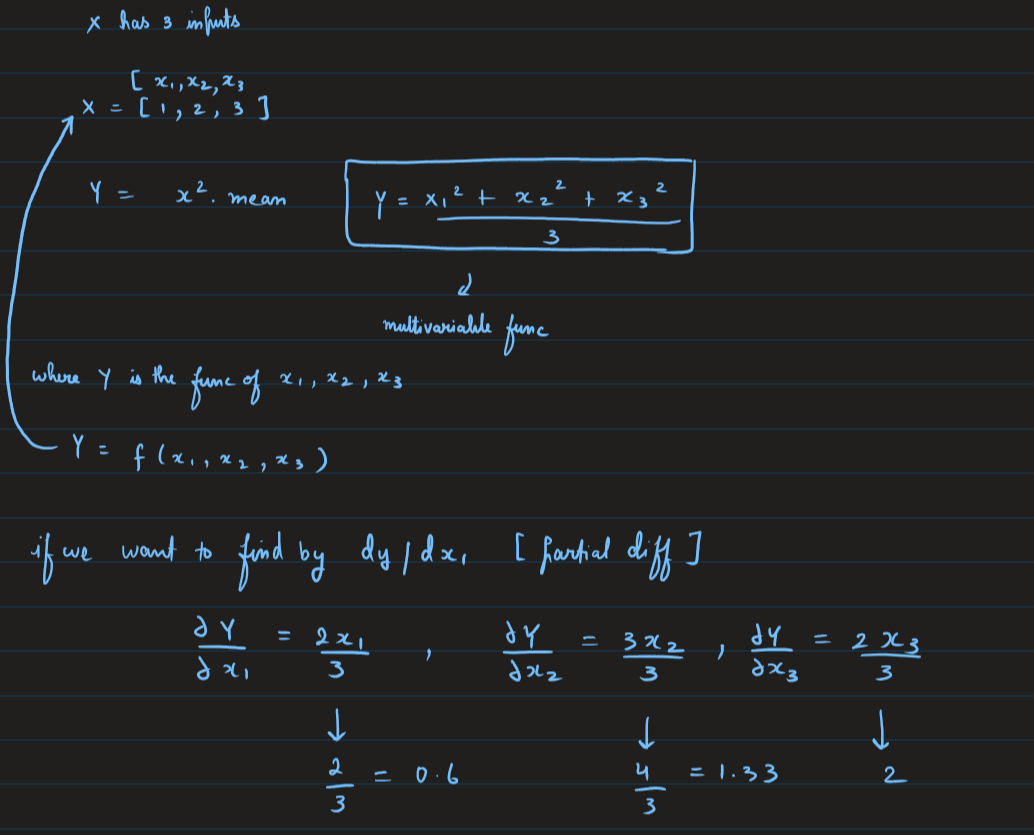

In [ ]:
# clearing gradients

In [29]:
# if we call backward functions multiple times, the gradients start accumulating
# example:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [30]:
# forward pass
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [31]:
y.backward() # backward pass

In [32]:
x.grad

tensor(4.)

In [33]:
# if we againn run the forward pass and backward pass
# then the gradients will accumulate instead of 4 it will show 8

tensor(0.)

In [42]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [43]:
y.backward()

In [44]:
x.grad

tensor(8.)

In [ ]:
# see it shows 8 now ,
# what happens is when we run forward and backward pass again
# it doesn't automatically gets cleared
# if there existed 4 before and another 4 comes
# then it will get added up
# if we again run it then it will become 12

In [45]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [46]:
y.backward()

In [47]:
x.grad

tensor(12.)

In [ ]:
# this is the problem of gradients getting accumulated and this is not desirable
# imagine we are training a NN, where we are performing backward and forward pass multiple times
# then previous pass gradient will get added up with next pass gradient
# and we will not be able to get right value of gradient.

In [ ]:
# therefore whenever we are running multiple passes on our data
# we need to clear our gradient
# therefore to clear , we write x.grad.zero_() - we are making the tensor zero by applying inplace (_)(underscore)

In [48]:
x.grad.zero_()

tensor(0.)

In [ ]:
#now if we apply forward and backward pass again it won't accumulate
# wont show 12 + 4 = 16

In [49]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [50]:
y.backward()

In [51]:
x.grad


tensor(4.)

In [52]:
x.grad.zero_()

tensor(0.)

In [53]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [54]:
y.backward()

In [55]:
x.grad

tensor(4.)

In [ ]:
# see now its not getting accumulated
# so before we run another pass we need to clear the gradient
# by running x.grad.zero_() first

In [ ]:
# how to disable gradient tracking

In [ ]:
# there will be some time when we won't be required to calc derivatives
# in that case if we want we can disable gradient tracking (flow of calculating derivative)

In [ ]:
# when can these scenario occur when we won't be requiring derivative calc ?
# example:
# let's say we are training a NN, at that time we need to calc derivatives
# and we need backward pass , so at that time we will keep gradient tracking on
# but when our NN is trained, during prediction we don't need backward pass
# at that time we can disable gradient tracking on our tensors.

In [ ]:
# example:

In [56]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [57]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [58]:
y.backward()

In [59]:
x.grad

tensor(4.)

In [ ]:
# let's say now our training is done, now we only need forward pass
# no need of calling backward function
# so we can disable gradient tracking - as it occupies memory
# and if we are working on a big NN then unecessary mem will be consumed
# if gradient tracking is left on.

In [60]:
# to disable gradient tracking we have 3 options
# option 1 - requires_grad_(False)
# option 2 - detach()
# option 3 - torch.no_grad()

In [ ]:
# Option 1

In [61]:
x.requires_grad_(False)

tensor(2.)

In [64]:
x

tensor(2.)

In [63]:
y = x ** 2

In [65]:
y

tensor(4.)

In [66]:
y.backward()
# backward pass won't work

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
# Option 2 - detach - here we make a completely new tensor

In [67]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [68]:
z = x.detach()
z
# z will have the exact value present in x
# only diff is it will be completely separated from computational graph
# and gradient tracking is disabled

tensor(2.)

In [69]:
y = x ** 2

In [70]:
y

tensor(4., grad_fn=<PowBackward0>)

In [71]:
y1 = z ** 2
y1

tensor(4.)

In [72]:
y.backward()

In [73]:
y1.backward()
# won't work

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
# Option 3

In [74]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [75]:
with torch.no_grad():
  y = x ** 2

In [76]:
y

tensor(4.)

In [78]:
y.backward()
# wont't work as gradient tracking is disabled

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
# if we remove the with statement then the gradient tracking is enabled again

In [80]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [81]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [82]:
y.backward()

In [84]:
x.grad

tensor(4.)